In [15]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def calculate_combined_score(filename):
    data = defaultdict(list)

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            run = int(row['run'])
            frame = int(row['frame'])
            clusters = int(row['clusters'])
            data[run].append((frame, clusters))

    performance_scores = {}

    for run, values in data.items():
        min_clusters = min(c for _, c in values)
        min_frame = min(f for f, c in values if c == min_clusters)
        score = 1 / (min_clusters * min_frame)
        performance_scores[run] = score

    scores = list(performance_scores.values())
    min_score = min(scores)
    max_score = max(scores)

    performance_scores_normalized = {}
    for run, score in performance_scores.items():
        if max_score == min_score:
            normalized = 0.0
        else:
            normalized = (score - min_score) / (max_score - min_score)
        performance_scores_normalized[run] = normalized
        
    return performance_scores_normalized

In [14]:
data_pheromones  = calculate_combined_score("simulation_results_pheromone_gradient.csv")
data_no_pheromones  = calculate_combined_score("simulation_results_no_pheromone_gradient.csv")

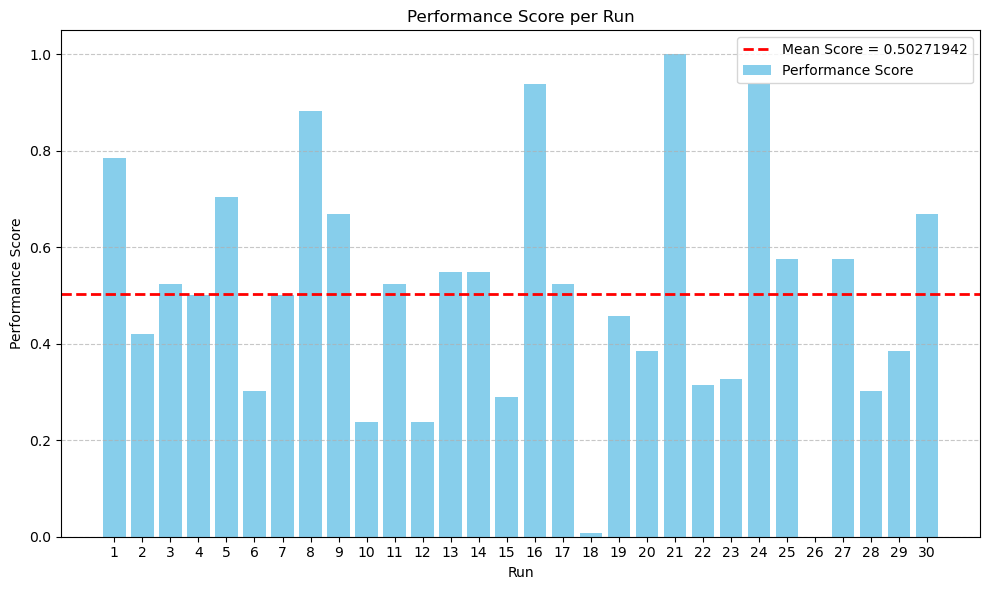

In [ ]:
runs = list(data_pheromones.keys())
scores = list(data_pheromones.values())

mean_score = np.mean(scores)

plt.figure(figsize=(10, 6))
plt.bar(runs, scores, color='skyblue', label='Performance Score')
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean Score = {mean_score:.8f}')
plt.xlabel('Run')
plt.ylabel('Performance Score')
plt.title('Performance Score per Run (pheromone gradient)')
plt.xticks(runs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

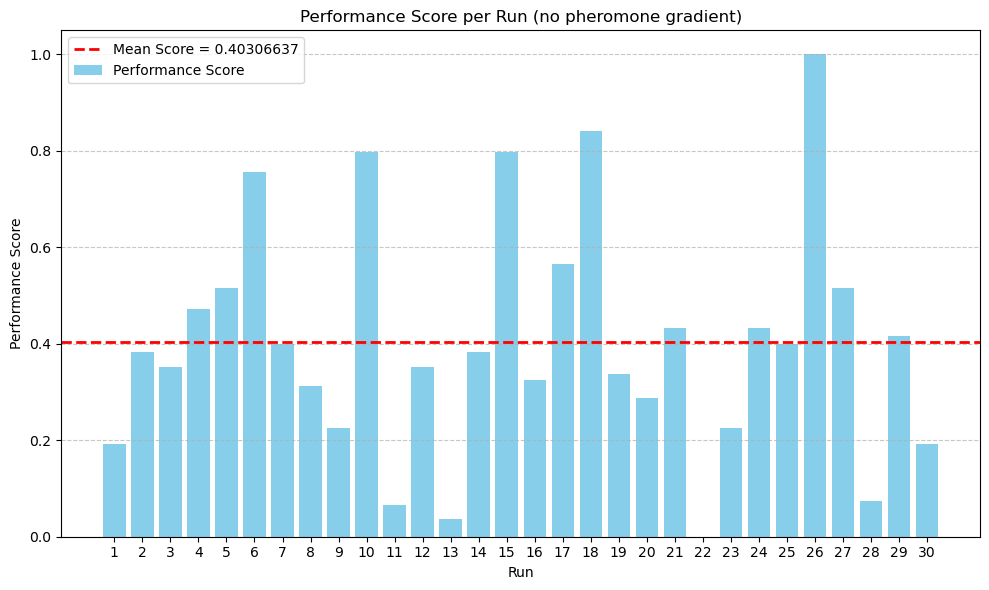

In [17]:
runs = list(data_no_pheromones.keys())
scores = list(data_no_pheromones.values())

mean_score = np.mean(scores)

plt.figure(figsize=(10, 6))
plt.bar(runs, scores, color='skyblue', label='Performance Score')
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean Score = {mean_score:.8f}')
plt.xlabel('Run')
plt.ylabel('Performance Score')
plt.title('Performance Score per Run (no pheromone gradient)')
plt.xticks(runs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()